In [1]:
#DATS 6103 - Individual Project 2 - Ruth Akor


 ## DO AFRICAN COUNTRIES REALLY NEED FOREIGN AID?

The aim of this project is to examine the impact of foreign aid (net official development assistance) received by African countries on the economic growth (GDP growth) in these countries. 

Data source: The World Bank database

Time frame: 1990 to 2019

#### DEFINITIONS OF VARIABLES IN THIS REPORT

Net Official Development Assistance (ODA): consists of disbursements of loans made on concessional terms (net of repayments of principal) and grants by official agencies of the members of the Development Assistance Committee (DAC), by multilateral institutions, and by non-DAC countries to promote economic development and welfare in countries and territories in the DAC list of ODA recipients. It includes loans with a grant element of at least 25 percent (calculated at a rate of discount of 10 percent). Data are in current U.S. dollars.

GDP Growth rate: The GDP growth rate measures how fast the economy is growing. 

External Debt: is owed to foreign lenders, including banks and other nations. These loans are often denominated in foreign currencies. If the central bank creates more money to pay off the debt, this causes the exchange rate of its currency to drop, so it will still owe the same amount of foreign currency.

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
py.sign_in('ruthakor', '1HgVOfW0VLt2QnLKh0Al')
print(plotly.__version__)

4.2.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import the data
foreignaid = pd.read_excel("foreignaid.xlsx")

In [5]:
foreignaid.head()

,Time,Time Code,Country Name,Country Code,Net official development assistance received (current US$) [DT.ODA.ODAT.CD],GDP (constant 2010 US$) [NY.GDP.MKTP.KD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]
0,1990,YR1990,Angola,AGO,2.6577e+08,3.18221e+10,8.5919e+09,-3.4501
1,1990,YR1990,Benin,BEN,266880000,3.03362e+09,1.11974e+09,8.97613
2,1990,YR1990,Botswana,BWA,145220000,5.31875e+09,5.5292e+08,6.77282
3,1990,YR1990,Burkina Faso,BFA,326530000,3.00767e+09,8.33673e+08,-0.602928
4,1990,YR1990,Burundi,BDI,262550000,1.78391e+09,9.06936e+08,3.49982


### Data Cleaning and Preprocessing

In [6]:
#drop all irrelevant columns
foreignaid = foreignaid.drop(['Time Code', 'Country Code'], axis=1)

#rename columns
foreignaid.columns = ['Year', 'Country', 'Net ODA received(USD)', 'GDP(USD)', 'Total External Debt(USD)', 'GDP growth(%)']
foreignaid.head()

,Year,Country,Net ODA received(USD),GDP(USD),Total External Debt(USD),GDP growth(%)
0,1990,Angola,2.6577e+08,3.18221e+10,8.5919e+09,-3.4501
1,1990,Benin,266880000,3.03362e+09,1.11974e+09,8.97613
2,1990,Botswana,145220000,5.31875e+09,5.5292e+08,6.77282
3,1990,Burkina Faso,326530000,3.00767e+09,8.33673e+08,-0.602928
4,1990,Burundi,262550000,1.78391e+09,9.06936e+08,3.49982


### Comparing Sub-Saharan Africa (SSA) Vs South Asia and the rest of the world

In trying to analyse the relationship between Official Development Assistance received and economic growth, I compare Sub-saharan Africa with South-Asia which is the region mostly used in the literature to compare to Africa because of the similar population and level of economic development

In [7]:
#creating a dataframe for only Net ODA and GDP growth
ODA_gdpgrw = foreignaid.drop(['GDP(USD)', 'Total External Debt(USD)'], axis=1)
ODA_gdpgrw = ODA_gdpgrw.dropna()
ODA_gdpgrw.head()

,Year,Country,Net ODA received(USD),GDP growth(%)
0,1990,Angola,2.6577e+08,-3.4501
1,1990,Benin,266880000,8.97613
2,1990,Botswana,145220000,6.77282
3,1990,Burkina Faso,326530000,-0.602928
4,1990,Burundi,262550000,3.49982


##### First, I will focus on Net ODA received in the world, SSA and in South Asia

In [8]:
ODA = foreignaid.drop(['GDP(USD)', 'Total External Debt(USD)', 'GDP growth(%)'], axis=1)
ODA = ODA.dropna()
ODA.head()

,Year,Country,Net ODA received(USD)
0,1990,Angola,2.6577e+08
1,1990,Benin,266880000
2,1990,Botswana,145220000
3,1990,Burkina Faso,326530000
4,1990,Burundi,262550000


In [9]:
#transpose data to keep years as columns
ODA_country = ODA.groupby(['Country', 'Year'])
ODA_coun_first = ODA_country.first()
ODA_coun_first

Net ODA received(USD)
Country  Year                      
Algeria  1990             331650000
         1991             211170000
         1992             374790000
         1993             326310000
         1994             295490000
         1995             295740000
         1996             306880000
         1997             247890000
         1998             419870000
         1999             137980000
         2000             199960000
         2001             198860000
         2002             186120000
         2003             239240000
         2004             316970000
         2005             347380000
         2006             240680000
         2007             395010000
         2008             324830000
         2009             302390000
         2010             201250000
         2011             193350000
         2012             147320000
         2013             203420000
         2014             160620000
         2015              87490000
         2016             157930000
         2017             189190000
         2018                    ..
         2019                    ..
...                             ...
Zimbabwe 1990             334260000
         1991             388680000
         1992             790180000
         1993             499310000
         1994             561380000
         1995             491500000
         1996             371760000
         1997             336640000
         1998            2.6134e+08
         1999             244630000
         2000             175640000
         2001             160210000
         2002             199130000
         2003             186920000
         2004             187300000
         2005             372940000
         2006             278240000
         2007             477460000
         2008             612750000
         2009             736550000
         2010             712530000
         2011             722580000
         2012            1001590000
         2013             827540000
         2014             760570000
         2015             788290000
         2016             654250000
         2017             725830000
         2018                    ..
         2019                    ..

[1680 rows x 1 columns]

In [10]:
reshaped_ODA = ODA_coun_first.unstack()
reshaped_ODA.head()

Net ODA received(USD)                                    \
Year                          1990        1991       1992       1993   
Country                                                                
Algeria                  331650000   211170000  374790000  326310000   
Angola                  2.6577e+08   277080000  343590000  289390000   
Benin                    266880000  2.6566e+08  269040000  287760000   
Botswana                 145220000   131070000  111260000  129900000   
Burkina Faso             326530000   419650000  433380000  468990000   

                                                                     \
Year               1994       1995       1996       1997       1998   
Country                                                               
Algeria       295490000  295740000  306880000  247890000  419870000   
Angola        447070000  416420000  459310000  354660000  335270000   
Benin         256380000  280560000  288290000  221150000  205230000   
Botswana       85180000   89660000   74570000  121620000  106250000   
Burkina Faso  433100000  490450000  419240000  369110000  400120000   

                        ...                                                    \
Year               1999 ...          2010       2011        2012         2013   
Country                 ...                                                     
Algeria       137980000 ...     201250000  193350000   147320000    203420000   
Angola        387540000 ...     235170000  192940000   243610000    285540000   
Benin         212440000 ...     689270000  672610000   507880000    660200000   
Botswana       60890000 ...     154670000  118500000    73070000    107370000   
Burkina Faso  398760000 ...   1.04462e+09  981980000  1152320000  1.04508e+09   

                                                                      
Year                2014       2015        2016       2017 2018 2019  
Country                                                               
Algeria        160620000   87490000   157930000  189190000   ..   ..  
Angola         235390000  380060000   206530000  223220000   ..   ..  
Benin          599320000  430140000   493120000  675840000   ..   ..  
Botswana        99370000  6.554e+07    90570000  102050000   ..   ..  
Burkina Faso  1123360000  996990000  1027490000  885390000   ..   ..  

[5 rows x 30 columns]

In [11]:
#I subset the Net ODA in the World, Sub-Saharan Africa and South Asia from the dataframe

World_Africa = reshaped_ODA.loc[['World', 'Sub-Saharan Africa', 'South Asia']]
World_Africa

Net ODA received(USD)                            \
Year                                1990         1991         1992   
Country                                                              
World                        58510300000  61863570000  60870780000   
Sub-Saharan Africa           17841890000  17822830000  19240770000   
South Asia                    5958340000   7975270000   6639330000   

                                                                        \
Year                       1993         1994         1995         1996   
Country                                                                  
World               56075480000  60292740000  59249680000  56369460000   
Sub-Saharan Africa  17349530000  19194360000  18636510000  16350740000   
South Asia           5263080000   7055730000   5170280000   5309700000   

                                                          ...                 \
Year                       1997         1998         1999 ...           2010   
Country                                                   ...                  
World               49101800000  51846250000  53064340000 ...   130941100000   
Sub-Saharan Africa  14895880000  14476800000  13226520000 ...    44362910000   
South Asia           4618550000   4907280000   4311860000 ...    15462490000   

                                                                           \
Year                        2011         2012          2013          2014   
Country                                                                     
World               141898300000  1.33768e+11  151144800000  161516800000   
Sub-Saharan Africa   47332210000  46763630000   47703150000   46459720000   
South Asia           16928910000  14128850000   13939530000   15584860000   

                                                                        
Year                        2015          2016          2017 2018 2019  
Country                                                                 
World               153207500000  158215000000  162778600000   ..   ..  
Sub-Saharan Africa   45796730000   44245710000   49274130000   ..   ..  
South Asia           15646220000   13944210000   14708680000   ..   ..  

[3 rows x 30 columns]

In [12]:
newreshaped = World_Africa.transpose()
newreshaped

Country                            World Sub-Saharan Africa   South Asia
                      Year                                              
Net ODA received(USD) 1990   58510300000        17841890000   5958340000
                      1991   61863570000        17822830000   7975270000
                      1992   60870780000        19240770000   6639330000
                      1993   56075480000        17349530000   5263080000
                      1994   60292740000        19194360000   7055730000
                      1995   59249680000        18636510000   5170280000
                      1996   56369460000        16350740000   5309700000
                      1997   49101800000        14895880000   4618550000
                      1998   51846250000        14476800000   4907280000
                      1999   53064340000        13226520000   4311860000
                      2000   49881340000        13057700000  4.13772e+09
                      2001   52078610000        14288190000   5942570000
                      2002   61777990000        19048810000   6865360000
                      2003   71327080000        24879350000   6023540000
                      2004   79601400000        26488480000   6982220000
                      2005  108212400000        32838650000   9406250000
                      2006  106758600000        41197030000   9282400000
                      2007  108089900000        36172450000  11685530000
                      2008  126635100000        40255200000  12177830000
                      2009  126770000000        44309030000  14578890000
                      2010  130941100000        44362910000  15462490000
                      2011  141898300000        47332210000  16928910000
                      2012   1.33768e+11        46763630000  14128850000
                      2013  151144800000        47703150000  13939530000
                      2014  161516800000        46459720000  15584860000
                      2015  153207500000        45796730000  15646220000
                      2016  158215000000        44245710000  13944210000
                      2017  162778600000        49274130000  14708680000
                      2018            ..                 ..           ..
                      2019            ..                 ..           ..

In [13]:
newreshaped.reset_index(inplace=True)
newreshaped['Year'] = newreshaped['Year'].astype(int)
#newreshaped.set_index("Year",drop=True,inplace=True)
newreshaped.head()

Country,level_0,Year,World,Sub-Saharan Africa,South Asia
0,Net ODA received(USD),1990,58510300000,17841890000,5958340000
1,Net ODA received(USD),1991,61863570000,17822830000,7975270000
2,Net ODA received(USD),1992,60870780000,19240770000,6639330000
3,Net ODA received(USD),1993,56075480000,17349530000,5263080000
4,Net ODA received(USD),1994,60292740000,19194360000,7055730000


In [14]:
newpivot_africa = newreshaped.drop(['level_0'], axis=1)
newpivot_africa.head()

Country,Year,World,Sub-Saharan Africa,South Asia
0,1990,58510300000,17841890000,5958340000
1,1991,61863570000,17822830000,7975270000
2,1992,60870780000,19240770000,6639330000
3,1993,56075480000,17349530000,5263080000
4,1994,60292740000,19194360000,7055730000


In [15]:
newpivot_africa.columns = ['Year', 'World', 'SSA', 'Southasia']
newpivot_africa.set_index("Year",drop=True,inplace=True)
newpivot_africa

,World,SSA,Southasia
Year,,,
1990,58510300000,17841890000,5958340000
1991,61863570000,17822830000,7975270000
1992,60870780000,19240770000,6639330000
1993,56075480000,17349530000,5263080000
1994,60292740000,19194360000,7055730000
1995,59249680000,18636510000,5170280000
1996,56369460000,16350740000,5309700000
1997,49101800000,14895880000,4618550000
1998,51846250000,14476800000,4907280000


In [16]:
#convert dataframe to numeric
newpivot_africa["World"] = pd.to_numeric(newpivot_africa.World, errors='coerce')
newpivot_africa["SSA"] = pd.to_numeric(newpivot_africa.SSA, errors='coerce')
newpivot_africa["Southasia"] = pd.to_numeric(newpivot_africa.Southasia, errors='coerce')

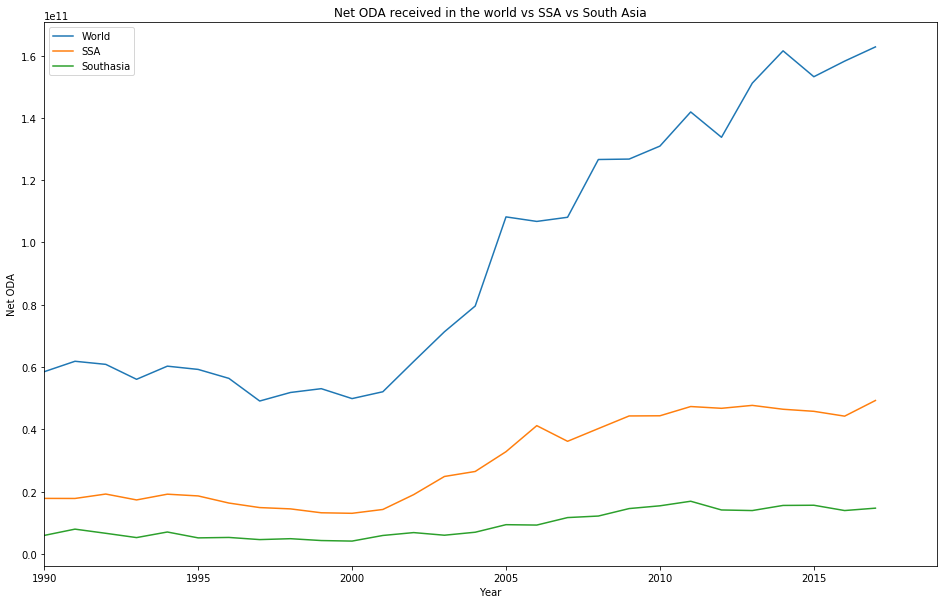

In [17]:
World_Africa_plot = newpivot_africa.plot.line(legend=True, figsize=(16,10), title='Net ODA received in the world vs SSA vs South Asia')
World_Africa_plot.set_ylabel('Net ODA')
plt.show()

From the plot above, there has been an increasing trend in Net ODA received globally and in SSA and South Asia. However, SSA has received more ODA than South Asia

### Comparing economic growth in the world Vs SSA vs South Asia over time

In [18]:
#creating a dataframe for only GDP growth
gdpgrw = foreignaid.drop(['Net ODA received(USD)', 'GDP(USD)', 'Total External Debt(USD)'], axis=1)
gdpgrw = gdpgrw.dropna()
gdpgrw.head()

,Year,Country,GDP growth(%)
0,1990,Angola,-3.4501
1,1990,Benin,8.97613
2,1990,Botswana,6.77282
3,1990,Burkina Faso,-0.602928
4,1990,Burundi,3.49982


In [19]:
#transpose data to keep years as columns
gdp_country = gdpgrw.groupby(['Country', 'Year'])
gdpgrw_first = gdp_country.first()
gdpgrw_first

GDP growth(%)
Country  Year              
Algeria  1990      0.800001
         1991          -1.2
         1992           1.8
         1993          -2.1
         1994     -0.899997
         1995       3.79999
         1996           4.1
         1997           1.1
         1998           5.1
         1999           3.2
         2000       3.81968
         2001        3.0084
         2002       5.60932
         2003       7.20187
         2004       4.30162
         2005       5.90779
         2006       1.68449
         2007       3.37288
         2008       2.36013
         2009       1.63224
         2010       3.63415
         2011       2.89187
         2012       3.37477
         2013       2.76764
         2014       3.78912
         2015       3.76347
         2016           3.3
         2017           1.6
         2018           2.1
         2019            ..
...                     ...
Zimbabwe 1990       6.98855
         1991       5.53178
         1992      -9.01557
         1993       1.05146
         1994        9.2352
         1995      0.158026
         1996       10.3607
         1997       2.68059
         1998       2.88521
         1999     -0.817821
         2000      -3.05919
         2001       1.43962
         2002      -8.89402
         2003      -16.9951
         2004      -5.80754
         2005      -5.71108
         2006       -3.4615
         2007      -3.65333
         2008      -17.6689
         2009       12.0196
         2010       19.6753
         2011       14.1939
         2012       16.6654
         2013       1.98949
         2014       2.37693
         2015       1.77987
         2016      0.755869
         2017       4.70404
         2018       6.15919
         2019            ..

[1680 rows x 1 columns]

In [20]:
reshaped_gdp = gdpgrw_first.unstack()
reshaped_gdp

GDP growth(%)                                 \
Year                              1990       1991      1992      1993   
Country                                                                 
Algeria                       0.800001       -1.2       1.8      -2.1   
Angola                         -3.4501   0.991359  -5.83828  -23.9834   
Benin                          8.97613     4.2258   2.95771   5.83617   
Botswana                       6.77282    7.45871   2.91707   1.91611   
Burkina Faso                 -0.602928    9.06998  0.232711   3.46138   
Burundi                        3.49982    4.99684      1.01     -6.24   
Cabo Verde                    0.692172    1.40415   10.9376   8.70831   
Cameroon                       -6.1057    -3.8086      -3.1  -7.93207   
Central African Republic      -2.14753  -0.552543  -6.42408  0.335276   
Chad                          -4.17847    8.53514   8.00144  -15.7098   
Comoros                        5.09124   -5.39564   8.53098   3.00606   
Congo, Dem. Rep.              -6.56831   -8.42105     -10.5  -13.4691   
Congo, Rep.                          1    2.39537   2.61195 -0.979683   
Cote d'Ivoire                 -1.09591  0.0409252 -0.244561 -0.192485   
Egypt, Arab Rep.               5.66703     1.1254   4.47286   2.90079   
Equatorial Guinea             -1.75856   -1.02224   34.7453   11.0332   
Eritrea                             ..         ..        ..   13.4548   
Eswatini                        21.018    1.76038   3.22621   3.10611   
Ethiopia                       2.72645   -7.13748  -8.67248   13.1428   
Gabon                          5.19224     6.1125  -3.09015   3.94656   
Gambia, The                    3.55888    3.10704   3.37869    3.0121   
Ghana                          3.32882    5.28183   3.87942      4.85   
Guinea                         4.32406    2.61342   3.27095   5.04414   
Guinea-Bissau                      6.1        5.1       1.1       2.1   
Kenya                          4.19205    1.43835 -0.799494  0.353197   
Lesotho                        6.04547    6.96661   6.95636   3.50977   
Liberia                             ..         ..        ..        ..   
Libya                               ..         ..        ..        ..   
Madagascar                     3.13003   -6.30953   1.18615   2.09656   
Malawi                         5.69229    8.73023  -7.33298   9.69184   
Mali                           -2.5024    11.7452  -3.21866   3.17217   
Mauritania                     -1.7713    1.78809   1.87413   5.87364   
Mauritius                      7.18674    4.43545    6.5127   5.08206   
Morocco                        3.41181    7.21609  -2.09774 -0.740592   
Mozambique                    0.999993        4.9  -5.23133   8.76714   
Namibia                        2.04746    8.16561   7.18934  -1.57954   
Niger                         -1.28436     2.5042  -6.51644   1.44944   
Nigeria                        11.7769   0.358353   4.63119  -2.03512   
Rwanda                        -2.39929   -2.51438   5.87273  -8.10869   
Sao Tome and Principe               ..         ..        ..        ..   
Senegal                      -0.675638    2.55583   1.24265   1.30078   
Seychelles                     6.99554    2.76043   7.16147   6.19665   
Sierra Leone                      3.35    2.35196  -19.0129   1.37455   
Somalia                       -1.48408         ..        ..        ..   
South Africa                 -0.317786   -1.01822  -2.13706   1.23352   
South Asia                     5.42837    1.86414   5.70833   4.42332   
South Sudan                         ..         ..        ..        ..   
Sub-Saharan Africa             2.38263   0.393813 -0.372914 -0.918747   
Sudan                         -5.47005    7.51091   6.57786   4.56875   
Tanzania                       7.04507    2.07199  0.584322    1.2058   
Togo                         -0.243656  -0.699967  -3.98069  -15.0958   
Tunisia                        7.94982    3.90455   7.80573   2.18983   
Uganda    

In [21]:
#subset the gdp growth in the World, Sub-Saharan Africa and South Asia from the dataframe

gdpgrowth = reshaped_gdp.loc[['World', 'Sub-Saharan Africa', 'South Asia']]
gdpgrowth
newgdpgrowth = gdpgrowth.transpose()
newgdpgrowth

Country               World Sub-Saharan Africa South Asia
              Year                                       
GDP growth(%) 1990  2.91246            2.38263    5.42837
              1991  1.41917           0.393813    1.86414
              1992   1.7672          -0.372914    5.70833
              1993  1.53419          -0.918747    4.42332
              1994  3.01193            1.20155    6.09474
              1995    3.029            3.37412    6.98824
              1996  3.38157            5.17149    6.89368
              1997  3.70442            3.59066     3.8121
              1998  2.55621            2.36928    5.63085
              1999  3.27181            2.13266    7.82375
              2000  4.39463             3.5038    4.06288
              2001  1.94531            4.25734    4.32869
              2002  2.19231            6.36301    3.72287
              2003  2.90909            4.24344    7.28182
              2004  4.38346             6.5251    7.56183
              2005   3.8685            6.22955    7.71852
              2006  4.33339            6.14102    7.74462
              2007  4.21775            6.61852    7.33197
              2008   1.8538            5.35452    3.23749
              2009 -1.68631            3.04579    7.13347
              2010  4.27959            5.58409    7.70267
              2011  3.11389            4.44641    5.13725
              2012  2.51259            4.00371    5.50174
              2013  2.65194            5.01946    6.08731
              2014  2.83994            4.67036     6.9923
              2015  2.85294            2.81584    7.48002
              2016  2.56541            1.19163    7.70781
              2017   3.1654            2.54586    6.93577
              2018  3.03878            2.41197    6.77063
              2019       ..                 ..         ..

In [22]:
newgdpgrowth.reset_index(inplace=True)
newgdpgrowth['Year'] = newgdpgrowth['Year'].astype(int)
newgdpgrowth

Country,level_0,Year,World,Sub-Saharan Africa,South Asia
0,GDP growth(%),1990,2.91246,2.38263,5.42837
1,GDP growth(%),1991,1.41917,0.393813,1.86414
2,GDP growth(%),1992,1.7672,-0.372914,5.70833
3,GDP growth(%),1993,1.53419,-0.918747,4.42332
4,GDP growth(%),1994,3.01193,1.20155,6.09474
5,GDP growth(%),1995,3.029,3.37412,6.98824
6,GDP growth(%),1996,3.38157,5.17149,6.89368
7,GDP growth(%),1997,3.70442,3.59066,3.8121
8,GDP growth(%),1998,2.55621,2.36928,5.63085
9,GDP growth(%),1999,3.27181,2.13266,7.82375


In [23]:
finalgdpgrowth = newgdpgrowth.drop(['level_0'], axis=1)
finalgdpgrowth

Country,Year,World,Sub-Saharan Africa,South Asia
0,1990,2.91246,2.38263,5.42837
1,1991,1.41917,0.393813,1.86414
2,1992,1.7672,-0.372914,5.70833
3,1993,1.53419,-0.918747,4.42332
4,1994,3.01193,1.20155,6.09474
5,1995,3.029,3.37412,6.98824
6,1996,3.38157,5.17149,6.89368
7,1997,3.70442,3.59066,3.8121
8,1998,2.55621,2.36928,5.63085
9,1999,3.27181,2.13266,7.82375


In [24]:
finalgdpgrowth.columns = ['Year', 'World', 'SSA', 'Southasia']
finalgdpgrowth.set_index("Year",drop=True,inplace=True)
finalgdpgrowth

,World,SSA,Southasia
Year,,,
1990,2.91246,2.38263,5.42837
1991,1.41917,0.393813,1.86414
1992,1.7672,-0.372914,5.70833
1993,1.53419,-0.918747,4.42332
1994,3.01193,1.20155,6.09474
1995,3.029,3.37412,6.98824
1996,3.38157,5.17149,6.89368
1997,3.70442,3.59066,3.8121
1998,2.55621,2.36928,5.63085


In [25]:
#convert dataframe to numeric
finalgdpgrowth["World"] = pd.to_numeric(finalgdpgrowth.World, errors='coerce')
finalgdpgrowth["SSA"] = pd.to_numeric(finalgdpgrowth.SSA, errors='coerce')
finalgdpgrowth["Southasia"] = pd.to_numeric(finalgdpgrowth.Southasia, errors='coerce')

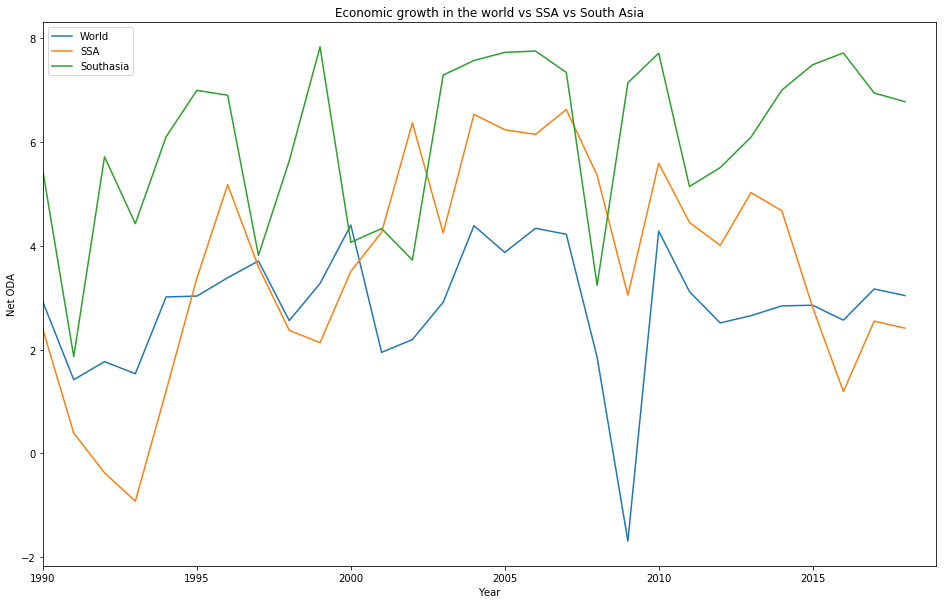

In [26]:
gdpgrowth_plot = finalgdpgrowth.plot.line(legend=True, figsize=(16,10), title='Economic growth in the world vs SSA vs South Asia')
gdpgrowth_plot.set_ylabel('Net ODA')
plt.show()

From the plot above, there is no rigid trend in economic growth globally and in the two regions. However, we can see that South Asia experiences more economic growth than SSA even though SSA receives more ODA. Also, there was a great decline in economic growth in the world, SSA and South Asia in 2008, this can be attributed to the global financial crisis

#### Next, I want to focus on only the Net Official Development Assistance received and see the top 10 countries in 1990 (start year of data), 2009 (year after the financial crisis which affected all African countries) and 2017 (the most recent year)

In [27]:
#I drop the rows for Net ODA in the World, South Asia and in Sub-saharan Africa

new_reshaped_ODA = reshaped_ODA.drop(['World', 'Sub-Saharan Africa', 'South Asia'])
new_reshaped_ODA

Net ODA received(USD)                          \
Year                                      1990        1991        1992   
Country                                                                  
Algeria                              331650000   211170000   374790000   
Angola                              2.6577e+08   277080000   343590000   
Benin                                266880000  2.6566e+08   269040000   
Botswana                             145220000   131070000   111260000   
Burkina Faso                         326530000   419650000   433380000   
Burundi                              262550000   2.564e+08   309280000   
Cabo Verde                           105280000   102000000   116480000   
Cameroon                             444380000   516260000   714780000   
Central African Republic             248890000   173440000   177650000   
Chad                                 310580000   262310000   236700000   
Comoros                               44880000    63300000    47870000   
Congo, Dem. Rep.                     895790000   475280000   268520000   
Congo, Rep.                          217160000  1.3327e+08   115000000   
Cote d'Ivoire                        686400000   629900000   755700000   
Egypt, Arab Rep.                    6065200000  5408840000  3737700000   
Equatorial Guinea                     60230000    62180000    61820000   
Eritrea                                4500000          ..     1000000   
Eswatini                              53630000    52920000    56010000   
Ethiopia                            1009250000  1091870000  1162510000   
Gabon                               1.3123e+08   142710000    68510000   
Gambia, The                           97260000    99540000   108840000   
Ghana                                559720000   878630000   614220000   
Guinea                               291580000   377520000   447280000   
Guinea-Bissau                        126350000   112820000   107300000   
Kenya                               1181290000   916460000   884920000   
Lesotho                              139130000   123310000   143160000   
Liberia                              113740000   157630000   119600000   
Libya                                  8340000     7490000     3280000   
Madagascar                           396960000   455110000   361550000   
Malawi                               500360000   549570000   578040000   
Mali                                 479170000   449680000   429690000   
Mauritania                           236180000   217400000   199620000   
Mauritius                             88290000    67320000    45690000   
Morocco                             1241090000  1532670000   953600000   
Mozambique                           997510000  1.0651e+09  1459680000   
Namibia                              119620000   180450000   142340000   
Niger                                387590000   369560000   356710000   
Nigeria                              255080000   258320000   258820000   
Rwanda                               287920000   359160000   348930000   
Sao Tome and Principe                 54120000    51010000    56430000   
Senegal                              811730000   627520000   662380000   
Seychelles                            35560000    22740000    19450000   
Sierra Leone                          59320000   103270000   133060000   
Somalia                             5.1481e+08   186420000   653660000   
South Africa                                ..          ..          ..   
South Sudan                                 ..          ..          ..   
Sudan                                848240000   867110000  5.3631e+08   
Tanzania                            1163150000  1073000000  1334080000   
Togo                                 258240000   199270000   222430000   
Tunisia                              392540000   354460000   387990000   
Uganda                               663100000   663280000   724950000   
Zambia                       

In [28]:
#rename the columns

new_reshaped_ODA.columns = ['yr1990', 'yr1991', 'yr1992', 'yr1993', 'yr1994', 'yr1995', 'yr1996', 'yr1997', 'yr1998', 'yr1999', 'yr2000', 'yr2001',
                       'yr2002', 'yr2003', 'yr2004', 'yr2005', 'yr2006', 'yr2007', 'yr2008', 'yr2009', 'yr2010', 'yr2011', 'yr2012', 'yr2013', 'yr2014', 
                       'yr2015', 'yr2016', 'yr2017', 'yr2018', 'yr2019']
new_reshaped_ODA

,yr1990,yr1991,yr1992,yr1993,yr1994,yr1995,yr1996,yr1997,yr1998,yr1999,...,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016,yr2017,yr2018,yr2019
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,331650000,211170000,374790000,326310000,295490000,295740000,306880000,247890000,419870000,137980000,...,201250000,193350000,147320000,203420000,160620000,87490000,157930000,189190000,..,..
Angola,2.6577e+08,277080000,343590000,289390000,447070000,416420000,459310000,354660000,335270000,387540000,...,235170000,192940000,243610000,285540000,235390000,380060000,206530000,223220000,..,..
Benin,266880000,2.6566e+08,269040000,287760000,256380000,280560000,288290000,221150000,205230000,212440000,...,689270000,672610000,507880000,660200000,599320000,430140000,493120000,675840000,..,..
Botswana,145220000,131070000,111260000,129900000,85180000,89660000,74570000,121620000,106250000,60890000,...,154670000,118500000,73070000,107370000,99370000,6.554e+07,90570000,102050000,..,..
Burkina Faso,326530000,419650000,433380000,468990000,433100000,490450000,419240000,369110000,400120000,398760000,...,1.04462e+09,981980000,1152320000,1.04508e+09,1123360000,996990000,1027490000,885390000,..,..
Burundi,262550000,2.564e+08,309280000,216950000,311110000,286950000,110520000,56400000,68750000,75100000,...,627610000,572240000,5.2417e+08,558830000,515400000,366540000,742470000,428410000,..,..
Cabo Verde,105280000,102000000,116480000,114960000,119670000,115730000,116460000,111010000,1.2977e+08,136970000,...,326980000,251370000,245640000,245160000,231390000,152820000,113360000,123000000,..,..
Cameroon,444380000,516260000,714780000,543720000,731410000,443990000,411380000,500060000,498690000,434480000,...,540230000,612080000,597170000,751960000,856120000,663080000,757050000,1212600000,..,..
Central African Republic,248890000,173440000,177650000,171740000,167560000,167780000,169130000,91550000,120620000,118760000,...,2.6098e+08,268770000,228020000,202820000,611000000,486730000,500960000,507810000,..,..


In [29]:
#Looks like data for 2018 and 2019 is unavailable, so I will drop the two columns

new_reshaped_ODA = new_reshaped_ODA.drop(['yr2018', 'yr2019'], axis=1)
new_reshaped_ODA.head()

,yr1990,yr1991,yr1992,yr1993,yr1994,yr1995,yr1996,yr1997,yr1998,yr1999,...,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016,yr2017
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,331650000,211170000,374790000,326310000,295490000,295740000,306880000,247890000,419870000,137980000,...,324830000,302390000,201250000,193350000,147320000,203420000,160620000,87490000,157930000,189190000
Angola,2.6577e+08,277080000,343590000,289390000,447070000,416420000,459310000,354660000,335270000,387540000,...,369040000,238940000,235170000,192940000,243610000,285540000,235390000,380060000,206530000,223220000
Benin,266880000,2.6566e+08,269040000,287760000,256380000,280560000,288290000,221150000,205230000,212440000,...,636720000,677560000,689270000,672610000,507880000,660200000,599320000,430140000,493120000,675840000
Botswana,145220000,131070000,111260000,129900000,85180000,89660000,74570000,121620000,106250000,60890000,...,723100000,282350000,154670000,118500000,73070000,107370000,99370000,6.554e+07,90570000,102050000
Burkina Faso,326530000,419650000,433380000,468990000,433100000,490450000,419240000,369110000,400120000,398760000,...,1000380000,1083700000,1.04462e+09,981980000,1152320000,1.04508e+09,1123360000,996990000,1027490000,885390000


#### 10 countries with highest ODA in 1990

In [30]:
#trying to convert from object to float
new_reshaped_ODA["yr1990"] = pd.to_numeric(new_reshaped_ODA.yr1990, errors='coerce')
new_reshaped_ODA["yr2009"] = pd.to_numeric(new_reshaped_ODA.yr2009, errors='coerce')
new_reshaped_ODA["yr2017"] = pd.to_numeric(new_reshaped_ODA.yr2017, errors='coerce')

In [31]:
topODA1990 = new_reshaped_ODA.nlargest(10, ['yr1990']) 

In [32]:
top_ODA_1990 = topODA1990.loc[:,['yr1990']]
pd.options.display.float_format = '{:,.2f}'.format
top_ODA_1990

,yr1990
Country,
"Egypt, Arab Rep.","6,065,200,000.00"
Morocco,"1,241,090,000.00"
Kenya,"1,181,290,000.00"
Tanzania,"1,163,150,000.00"
Ethiopia,"1,009,250,000.00"
Mozambique,"997,510,000.00"
"Congo, Dem. Rep.","895,790,000.00"
Sudan,"848,240,000.00"
Senegal,"811,730,000.00"


In [33]:
def PiePlot(Year):
    df = new_reshaped_ODA[Year]
    result = df.sort_values(ascending=False)
    result = result.reset_index()
    result.index = result.index + 1
    others = result[10:].sum()[1]
    top = result[:10]
    top.loc[11] = ['All Other Countries', others]
    
    countryPlot = top[Year].plot.pie(subplots=True,
                                     autopct='%0.1f',
                                     fontsize=10,
                                     figsize=(10,10),
                                     legend=False,
                                     labels=top['Country'],
                                     shadow=False,
                                     explode=(0.15,0.12,0,0,0,0,0,0,0,0,0),
                                     startangle=90)
    countryPlot[0].set_ylabel('')

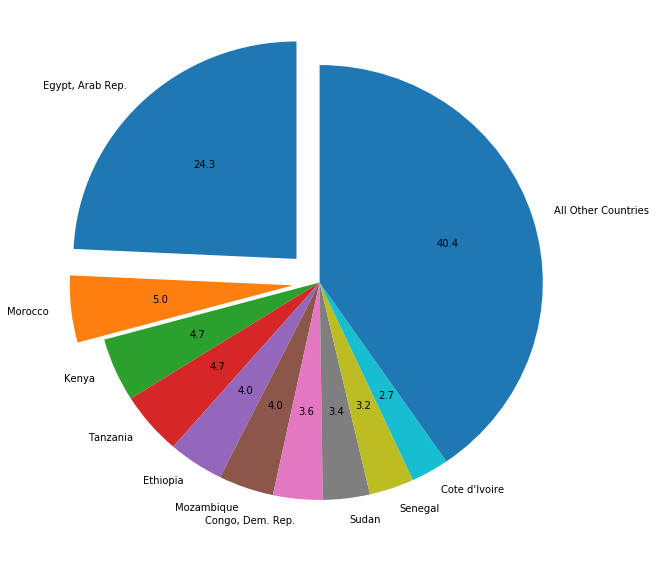

In [34]:
PiePlot('yr1990')
plt.show()

#### 10 countries with highest ODA in 2009

In [35]:
topODA2009 = new_reshaped_ODA.nlargest(10, ['yr2009']) 
top_ODA_2009 = topODA2009.loc[:,['yr2009']]
pd.options.display.float_format = '{:,.2f}'.format
top_ODA_2009

,yr2009
Country,
Ethiopia,"3,823,760,000.00"
Tanzania,"3,127,200,000.00"
Cote d'Ivoire,"2,403,010,000.00"
"Congo, Dem. Rep.","2,362,350,000.00"
Sudan,"2,352,470,000.00"
Mozambique,"2,013,600,000.00"
Uganda,"1,786,350,000.00"
Kenya,"1,782,480,000.00"
Nigeria,"1,639,230,000.00"


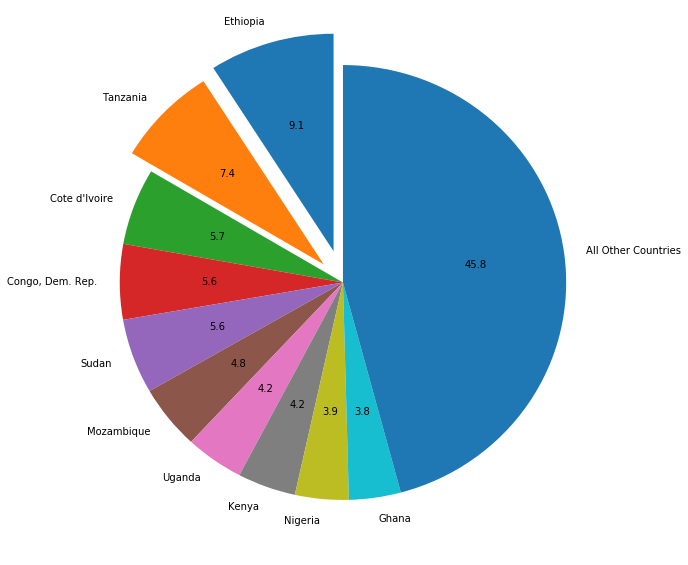

In [36]:
PiePlot('yr2009')
plt.show()

#### 10 countries with highest ODA in 2017

In [37]:
topODA2017 = new_reshaped_ODA.nlargest(10, ['yr2017']) 
top_ODA_2017 = topODA2017.loc[:,['yr2017']]
pd.options.display.float_format = '{:,.2f}'.format
top_ODA_2017

,yr2017
Country,
Ethiopia,4117500000
Nigeria,3358790000
Tanzania,2584170000
Kenya,2474760000
"Congo, Dem. Rep.",2280210000
South Sudan,2183170000
Uganda,2008120000
Morocco,1884890000
Mozambique,1775660000


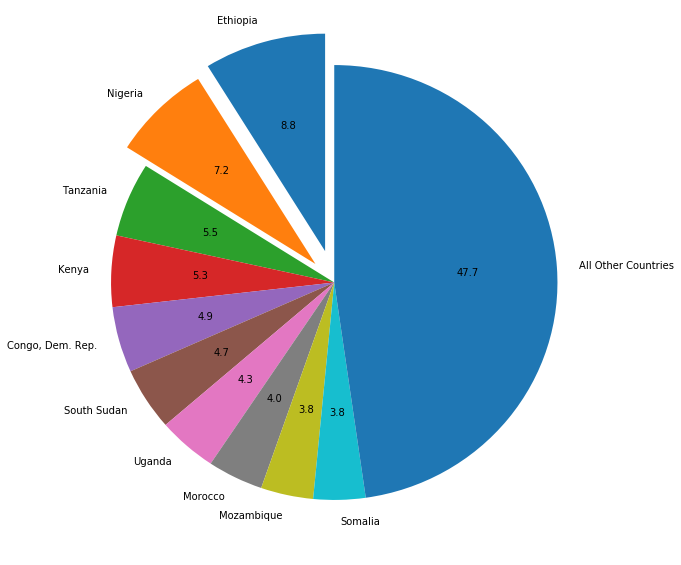

In [38]:
PiePlot('yr2017')
plt.show()

### ODA Vs Economic Growth (GDP) in 1990

In [39]:
# select data for only 1990
ODA_gdpgrw_1990 = ODA_gdpgrw.loc[ODA_gdpgrw['Year'] == 1990]
pd.options.display.float_format = '{:,.2f}'.format
ODA_gdpgrw_1990

,Year,Country,Net ODA received(USD),GDP growth(%)
0,1990,Angola,"265,770,000.00",-3.45
1,1990,Benin,266880000,8.98
2,1990,Botswana,145220000,6.77
3,1990,Burkina Faso,326530000,-0.60
4,1990,Burundi,262550000,3.50
5,1990,Cabo Verde,105280000,0.69
6,1990,Cameroon,444380000,-6.11
7,1990,Central African Republic,248890000,-2.15
8,1990,Chad,310580000,-4.18
9,1990,Comoros,44880000,5.09


In [40]:
#drop year column
ODA_gdpgrw_1990 = ODA_gdpgrw_1990.drop(['Year'], axis=1)
ODA_gdpgrw_1990.columns = ['Country', 'netODA', 'GDPgrw']
ODA_gdpgrw_1990

,Country,netODA,GDPgrw
0,Angola,"265,770,000.00",-3.45
1,Benin,266880000,8.98
2,Botswana,145220000,6.77
3,Burkina Faso,326530000,-0.60
4,Burundi,262550000,3.50
5,Cabo Verde,105280000,0.69
6,Cameroon,444380000,-6.11
7,Central African Republic,248890000,-2.15
8,Chad,310580000,-4.18
9,Comoros,44880000,5.09


In [41]:
#sort by net ODA
ODA_gdpgrw_1990["netODA"] = pd.to_numeric(ODA_gdpgrw_1990.netODA, errors='coerce')
sort_ODA_gdpgrw_1990 = ODA_gdpgrw_1990.sort_values('netODA', ascending=False)
sort_ODA_gdpgrw_1990.head(50)



,Country,netODA,GDPgrw
53,World,"58,510,300,000.00",2.91
54,Sub-Saharan Africa,"17,841,890,000.00",2.38
49,"Egypt, Arab Rep.","6,065,200,000.00",5.67
55,South Asia,"5,958,340,000.00",5.43
50,Morocco,"1,241,090,000.00",3.41
22,Kenya,"1,181,290,000.00",4.19
43,Tanzania,"1,163,150,000.00",7.05
16,Ethiopia,"1,009,250,000.00",2.73
30,Mozambique,"997,510,000.00",1.00
10,"Congo, Dem. Rep.","895,790,000.00",-6.57


In [42]:
#drop row for world ODA
indexNames = sort_ODA_gdpgrw_1990[ (sort_ODA_gdpgrw_1990['Country'] == 'World') ].index
 
sort_ODA_gdpgrw_1990.drop(indexNames , inplace=True)


sort_ODA_gdpgrw_1990

,Country,netODA,GDPgrw
54,Sub-Saharan Africa,"17,841,890,000.00",2.38
49,"Egypt, Arab Rep.","6,065,200,000.00",5.67
55,South Asia,"5,958,340,000.00",5.43
50,Morocco,"1,241,090,000.00",3.41
22,Kenya,"1,181,290,000.00",4.19
43,Tanzania,"1,163,150,000.00",7.05
16,Ethiopia,"1,009,250,000.00",2.73
30,Mozambique,"997,510,000.00",1.00
10,"Congo, Dem. Rep.","895,790,000.00",-6.57
42,Sudan,"848,240,000.00",-5.47


In [43]:
#drop row for ODA in Sub-Saharan Africa
indexNames = sort_ODA_gdpgrw_1990[ (sort_ODA_gdpgrw_1990['Country'] == 'Sub-Saharan Africa') ].index
 
sort_ODA_gdpgrw_1990.drop(indexNames , inplace=True)


sort_ODA_gdpgrw_1990

,Country,netODA,GDPgrw
49,"Egypt, Arab Rep.","6,065,200,000.00",5.67
55,South Asia,"5,958,340,000.00",5.43
50,Morocco,"1,241,090,000.00",3.41
22,Kenya,"1,181,290,000.00",4.19
43,Tanzania,"1,163,150,000.00",7.05
16,Ethiopia,"1,009,250,000.00",2.73
30,Mozambique,"997,510,000.00",1.00
10,"Congo, Dem. Rep.","895,790,000.00",-6.57
42,Sudan,"848,240,000.00",-5.47
36,Senegal,"811,730,000.00",-0.68


In [44]:
#drop row for ODA in South Asia
indexNames = sort_ODA_gdpgrw_1990[ (sort_ODA_gdpgrw_1990['Country'] == 'South Asia') ].index
 
sort_ODA_gdpgrw_1990.drop(indexNames , inplace=True)


sort_ODA_gdpgrw_1990

,Country,netODA,GDPgrw
49,"Egypt, Arab Rep.","6,065,200,000.00",5.67
50,Morocco,"1,241,090,000.00",3.41
22,Kenya,"1,181,290,000.00",4.19
43,Tanzania,"1,163,150,000.00",7.05
16,Ethiopia,"1,009,250,000.00",2.73
30,Mozambique,"997,510,000.00",1.00
10,"Congo, Dem. Rep.","895,790,000.00",-6.57
42,Sudan,"848,240,000.00",-5.47
36,Senegal,"811,730,000.00",-0.68
12,Cote d'Ivoire,"686,400,000.00",-1.10


In [45]:
toptenODAGDP90 = sort_ODA_gdpgrw_1990.head(10)
toptenODAGDP90

,Country,netODA,GDPgrw
49,"Egypt, Arab Rep.","6,065,200,000.00",5.67
50,Morocco,"1,241,090,000.00",3.41
22,Kenya,"1,181,290,000.00",4.19
43,Tanzania,"1,163,150,000.00",7.05
16,Ethiopia,"1,009,250,000.00",2.73
30,Mozambique,"997,510,000.00",1.00
10,"Congo, Dem. Rep.","895,790,000.00",-6.57
42,Sudan,"848,240,000.00",-5.47
36,Senegal,"811,730,000.00",-0.68
12,Cote d'Ivoire,"686,400,000.00",-1.10


In [46]:
#reset index
toptenODAGDP90.set_index("Country",drop=True,inplace=True)
toptenODAGDP90

,netODA,GDPgrw
Country,,
"Egypt, Arab Rep.","6,065,200,000.00",5.67
Morocco,"1,241,090,000.00",3.41
Kenya,"1,181,290,000.00",4.19
Tanzania,"1,163,150,000.00",7.05
Ethiopia,"1,009,250,000.00",2.73
Mozambique,"997,510,000.00",1.00
"Congo, Dem. Rep.","895,790,000.00",-6.57
Sudan,"848,240,000.00",-5.47
Senegal,"811,730,000.00",-0.68


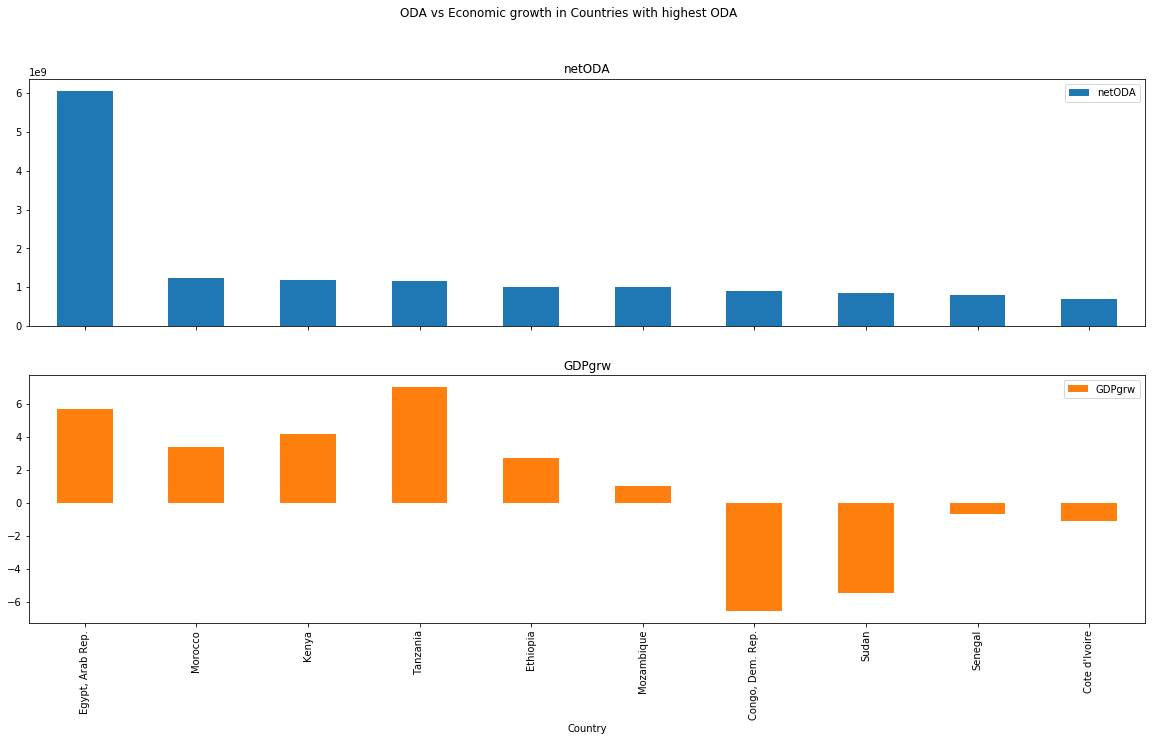

In [47]:
plot_topten90 = toptenODAGDP90.plot(subplots=True, kind='bar',figsize=(20,10), title='ODA vs Economic growth in Countries with highest ODA')
plt.legend(loc='best', fontsize=10)
plt.show()

 4 out of 10 countries with highest ODA received in 1990 had negative economic growth in that year

#### ODA Vs Economic Growth in 2009

In [48]:
# select data for only 2009
ODA_gdpgrw_2009 = ODA_gdpgrw.loc[ODA_gdpgrw['Year'] == 2009]
pd.options.display.float_format = '{:,.2f}'.format
ODA_gdpgrw_2009.set_index("Country",drop=True,inplace=True)
ODA_gdpgrw_2009

,Year,Net ODA received(USD),GDP growth(%)
Country,,,
Angola,2009,238940000,0.86
Benin,2009,677560000,2.33
Botswana,2009,282350000,-7.65
Burkina Faso,2009,1083700000,2.96
Burundi,2009,575750000,3.81
Cabo Verde,2009,196770000,-1.27
Cameroon,2009,643790000,2.20
Central African Republic,2009,241140000,8.59
Chad,2009,558330000,4.22


In [49]:
#drop year column
ODA_gdpgrw_2009 = ODA_gdpgrw_2009.drop(['Year'], axis=1)
ODA_gdpgrw_2009.columns = ['netODA', 'GDPgrw']
ODA_gdpgrw_2009

,netODA,GDPgrw
Country,,
Angola,238940000,0.86
Benin,677560000,2.33
Botswana,282350000,-7.65
Burkina Faso,1083700000,2.96
Burundi,575750000,3.81
Cabo Verde,196770000,-1.27
Cameroon,643790000,2.20
Central African Republic,241140000,8.59
Chad,558330000,4.22


In [50]:
#sort by net ODA
ODA_gdpgrw_2009["netODA"] = pd.to_numeric(ODA_gdpgrw_2009.netODA, errors='coerce')
sort_ODA_gdpgrw_2009 = ODA_gdpgrw_2009.sort_values('netODA', ascending=False)
sort_ODA_gdpgrw_2009.head(50)


,netODA,GDPgrw
Country,,
World,"126,770,000,000.00",-1.69
Sub-Saharan Africa,"44,309,030,000.00",3.05
South Asia,"14,578,890,000.00",7.13
Ethiopia,"3,823,760,000.00",8.80
Tanzania,"3,127,200,000.00",5.27
Cote d'Ivoire,"2,403,010,000.00",3.25
"Congo, Dem. Rep.","2,362,350,000.00",2.86
Sudan,"2,352,470,000.00",3.24
Mozambique,"2,013,600,000.00",6.35


In [51]:
#drop row for ODA for World, Sub-Saharan Africa and South Asia
newODA_gdpgrw_2009 = sort_ODA_gdpgrw_2009.drop(['World', 'Sub-Saharan Africa', 'South Asia'])
newODA_gdpgrw_2009

,netODA,GDPgrw
Country,,
Ethiopia,"3,823,760,000.00",8.80
Tanzania,"3,127,200,000.00",5.27
Cote d'Ivoire,"2,403,010,000.00",3.25
"Congo, Dem. Rep.","2,362,350,000.00",2.86
Sudan,"2,352,470,000.00",3.24
Mozambique,"2,013,600,000.00",6.35
Uganda,"1,786,350,000.00",6.80
Kenya,"1,782,480,000.00",3.31
Nigeria,"1,639,230,000.00",8.04


In [52]:
#print top ten countries with highest ODA in 2009
toptenODAGDP09 = newODA_gdpgrw_2009.head(10)
toptenODAGDP09

,netODA,GDPgrw
Country,,
Ethiopia,"3,823,760,000.00",8.80
Tanzania,"3,127,200,000.00",5.27
Cote d'Ivoire,"2,403,010,000.00",3.25
"Congo, Dem. Rep.","2,362,350,000.00",2.86
Sudan,"2,352,470,000.00",3.24
Mozambique,"2,013,600,000.00",6.35
Uganda,"1,786,350,000.00",6.80
Kenya,"1,782,480,000.00",3.31
Nigeria,"1,639,230,000.00",8.04


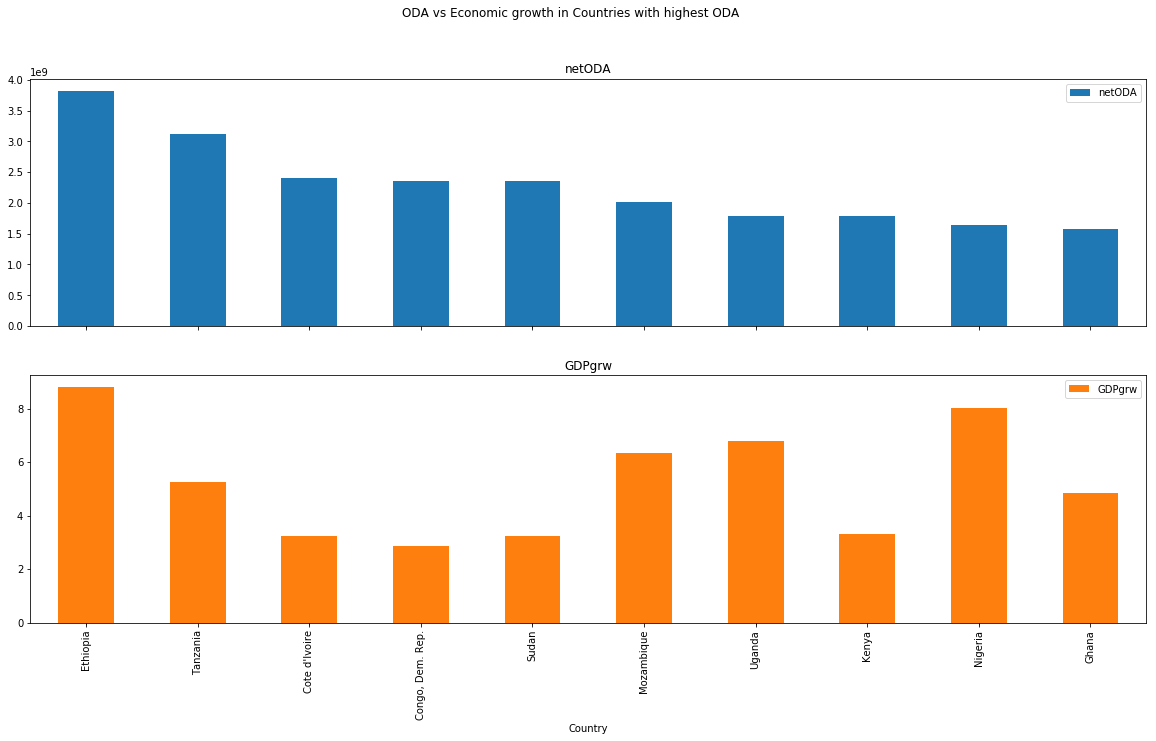

In [53]:
plot_topten2009 = toptenODAGDP09.plot(subplots=True, kind='bar',figsize=(20,10), title='ODA vs Economic growth in Countries with highest ODA')
plt.legend(loc='best', fontsize=10)
plt.show()

It is interesting to see that in 2009, right after the financial crisis, all top 10 african countries that received highest ODA all experienced positive economic growth

#### ODA Vs Economic Growth in 2017

In [54]:
# select data for only 2017
ODA_gdpgrw_2017 = ODA_gdpgrw.loc[ODA_gdpgrw['Year'] == 2017]
pd.options.display.float_format = '{:,.2f}'.format
ODA_gdpgrw_2017.set_index("Country",drop=True,inplace=True)
ODA_gdpgrw_2017

,Year,Net ODA received(USD),GDP growth(%)
Country,,,
Angola,2017,223220000,-0.15
Benin,2017,675840000,5.84
Botswana,2017,102050000,2.91
Burkina Faso,2017,885390000,6.30
Burundi,2017,428410000,0.50
Cabo Verde,2017,123000000,4.01
Cameroon,2017,1212600000,3.55
Central African Republic,2017,507810000,4.46
Chad,2017,647830000,-2.99


In [55]:
#drop year column
ODA_gdpgrw_2017 = ODA_gdpgrw_2017.drop(['Year'], axis=1)
ODA_gdpgrw_2017.columns = ['netODA', 'GDPgrw']
ODA_gdpgrw_2017

,netODA,GDPgrw
Country,,
Angola,223220000,-0.15
Benin,675840000,5.84
Botswana,102050000,2.91
Burkina Faso,885390000,6.30
Burundi,428410000,0.50
Cabo Verde,123000000,4.01
Cameroon,1212600000,3.55
Central African Republic,507810000,4.46
Chad,647830000,-2.99


In [56]:
#sort by net ODA
ODA_gdpgrw_2017["netODA"] = pd.to_numeric(ODA_gdpgrw_2017.netODA, errors='coerce')
sort_ODA_gdpgrw_2017 = ODA_gdpgrw_2017.sort_values('netODA', ascending=False)
sort_ODA_gdpgrw_2017.head(50)

,netODA,GDPgrw
Country,,
World,162778600000,3.17
Sub-Saharan Africa,49274130000,2.55
South Asia,14708680000,6.94
Ethiopia,4117500000,9.50
Nigeria,3358790000,0.81
Tanzania,2584170000,6.79
Kenya,2474760000,4.86
"Congo, Dem. Rep.",2280210000,3.73
South Sudan,2183170000,..


In [57]:
#drop row for ODA for World, Sub-Saharan Africa and South Asia
newODA_gdpgrw_2017 = sort_ODA_gdpgrw_2017.drop(['World', 'Sub-Saharan Africa', 'South Asia'])
newODA_gdpgrw_2017 = newODA_gdpgrw_2017.drop(['South Sudan', 'Somalia'])
newODA_gdpgrw_2017

,netODA,GDPgrw
Country,,
Ethiopia,4117500000,9.50
Nigeria,3358790000,0.81
Tanzania,2584170000,6.79
Kenya,2474760000,4.86
"Congo, Dem. Rep.",2280210000,3.73
Uganda,2008120000,3.86
Morocco,1884890000,4.09
Mozambique,1775660000,3.74
Malawi,1515470000,4.00


In [58]:
#print top ten countries with highest ODA in 2009
toptenODAGDP17 = newODA_gdpgrw_2017.head(10)
toptenODAGDP17

,netODA,GDPgrw
Country,,
Ethiopia,4117500000,9.50
Nigeria,3358790000,0.81
Tanzania,2584170000,6.79
Kenya,2474760000,4.86
"Congo, Dem. Rep.",2280210000,3.73
Uganda,2008120000,3.86
Morocco,1884890000,4.09
Mozambique,1775660000,3.74
Malawi,1515470000,4.00


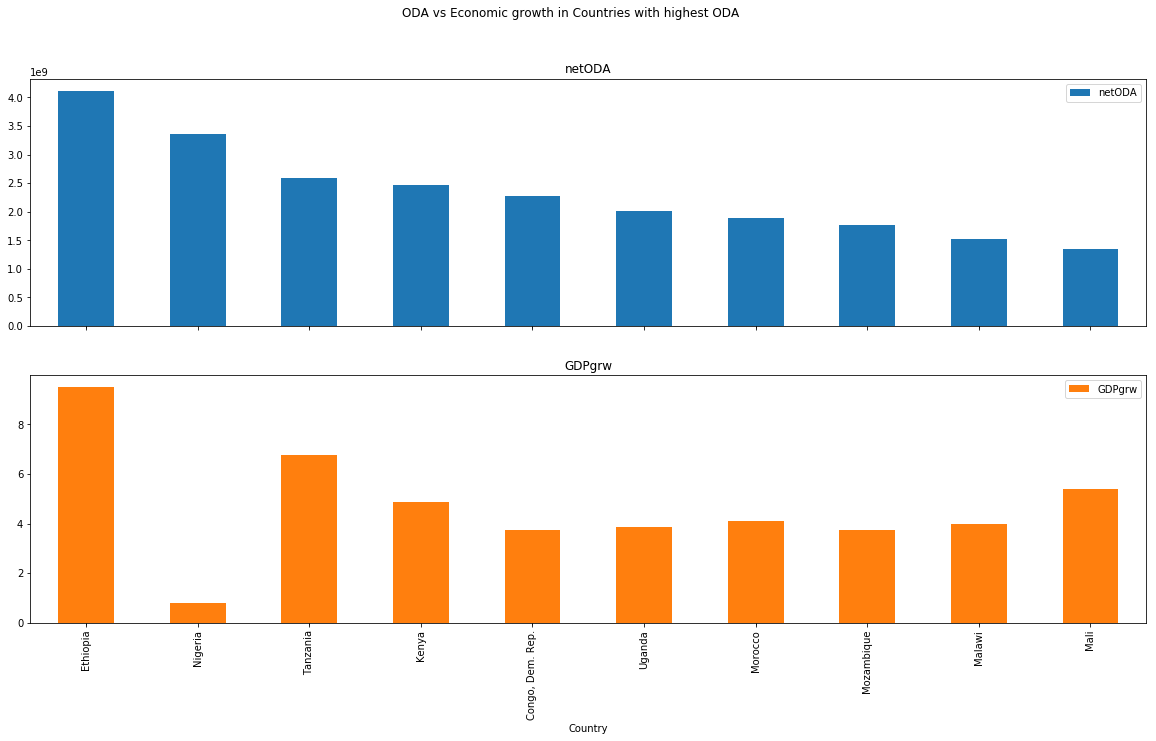

In [59]:
plot_topten2017 = toptenODAGDP17.plot(subplots=True, kind='bar',figsize=(20,10), title='ODA vs Economic growth in Countries with highest ODA')
plt.legend(loc='best', fontsize=10)
plt.show()

In 2017, all countries with highest ODA experienced positive economic growth. Although Nigeria was 2nd highest recipient of ODA in 2017, it had the lowest economic growth among the ten countries

#### What year ODA received was highest and lowest in Africa?

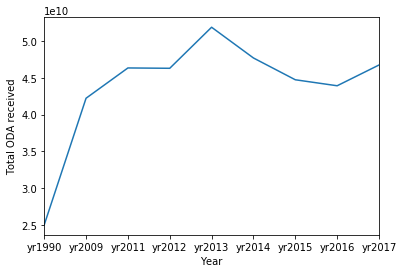

In [60]:
#Plot the net ODA over time to determine the highest year and the trend

ax = new_reshaped_ODA.sum().plot()
ax.set_xlabel("Year")
ax.set_ylabel('Total ODA received')
plt.show()

ODA to Africa has been increasing since 1990, but was highest in 2013 and lowest in 2016

#### What is the correlation between ODA and GDP growth?

In [61]:
ODA_gdpgrw.columns = ['Year', 'Country', 'netODA', 'GDPgrwth']
ODA_gdpgrw["netODA"] = pd.to_numeric(ODA_gdpgrw.netODA, errors='coerce')
ODA_gdpgrw["GDPgrwth"] = pd.to_numeric(ODA_gdpgrw.GDPgrwth, errors='coerce')

In [62]:
ODA_gdpgrw.corr(method ='pearson') 

,netODA,GDPgrwth
netODA,1.00,-0.02
GDPgrwth,-0.02,1.00


A correlation coefficient of -0.02 shows a very weak negative relationship between ODA and economic growth. The coefficient is close to zero and this could imply that as ODA increases, there is a tendency for economic growth to decrease 

  ### Mapping ODA received by country

In [63]:
mapdata = new_reshaped_ODA.reset_index()
mapdata

,Country,yr1990,yr1991,yr1992,yr1993,yr1994,yr1995,yr1996,yr1997,yr1998,...,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016,yr2017
0,Algeria,"331,650,000.00",211170000,374790000,326310000,295490000,295740000,306880000,247890000,419870000,...,324830000,"302,390,000.00",201250000,193350000,147320000,203420000,160620000,87490000,157930000,189190000
1,Angola,"265,770,000.00",277080000,343590000,289390000,447070000,416420000,459310000,354660000,335270000,...,369040000,"238,940,000.00",235170000,192940000,243610000,285540000,235390000,380060000,206530000,223220000
2,Benin,"266,880,000.00","265,660,000.00",269040000,287760000,256380000,280560000,288290000,221150000,205230000,...,636720000,"677,560,000.00",689270000,672610000,507880000,660200000,599320000,430140000,493120000,675840000
3,Botswana,"145,220,000.00",131070000,111260000,129900000,85180000,89660000,74570000,121620000,106250000,...,723100000,"282,350,000.00",154670000,118500000,73070000,107370000,99370000,"65,540,000.00",90570000,102050000
4,Burkina Faso,"326,530,000.00",419650000,433380000,468990000,433100000,490450000,419240000,369110000,400120000,...,1000380000,"1,083,700,000.00","1,044,620,000.00",981980000,1152320000,"1,045,080,000.00",1123360000,996990000,1027490000,885390000
5,Burundi,"262,550,000.00","256,400,000.00",309280000,216950000,311110000,286950000,110520000,56400000,68750000,...,"520,430,000.00","575,750,000.00",627610000,572240000,"524,170,000.00",558830000,515400000,366540000,742470000,428410000
6,Cabo Verde,"105,280,000.00",102000000,116480000,114960000,119670000,115730000,116460000,111010000,"129,770,000.00",...,221880000,"196,770,000.00",326980000,251370000,245640000,245160000,231390000,152820000,113360000,123000000
7,Cameroon,"444,380,000.00",516260000,714780000,543720000,731410000,443990000,411380000,500060000,498690000,...,551790000,"643,790,000.00",540230000,612080000,597170000,751960000,856120000,663080000,757050000,1212600000
8,Central African Republic,"248,890,000.00",173440000,177650000,171740000,167560000,167780000,169130000,91550000,120620000,...,260370000,"241,140,000.00","260,980,000.00",268770000,228020000,202820000,611000000,486730000,500960000,507810000
9,Chad,"310,580,000.00",262310000,236700000,223470000,212290000,235020000,295780000,227960000,174440000,...,441810000,"558,330,000.00",490160000,457660000,475130000,459340000,391930000,606650000,624460000,647830000


##### 1990

In [64]:
# Mapping ODA received in 1990

#set scale and color ranges
scale = [[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],   [1.0, 'rgb(63,20,122)']]

#dataset to be graphed
data = [dict(type='choropleth', 
             colorscale=scale, 
             locations=mapdata['Country'],
             z=mapdata['yr1990'].astype(float),
             locationmode='country names',
             text=mapdata['Country'],
             hoverinfo='location+z',
             marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
             colorbar=dict(title='ODA received by African countries in 1990'))]

#layout
layout = dict(title='ODA received by African Countries in 1990 <br />(Hover for each country)',
              geo=dict(scope='africa', 
                       projection=dict(type='sinusoidal'),
                       showlakes=True,
                       lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='DATS 6103 - Individual Project 2 - Ruth Akor')

Net ODA received in Africa in 1990 was relatively small, with Egypt having very high ODA received, pushing the max range to $6Bn

##### 2009

In [65]:
#Mapping ODA received in 2009

#set scale and color ranges
scale = [[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],   [1.0, 'rgb(63,20,122)']]

#dataset to be graphed
data = [dict(type='choropleth', 
             colorscale=scale, 
             locations=mapdata['Country'],
             z=mapdata['yr2009'].astype(float),
             locationmode='country names',
             text=mapdata['Country'],
             hoverinfo='location+z',
             marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
             colorbar=dict(title='ODA received by African countries in 2009'))]

#layout
layout = dict(title='ODA received by African Countries in 2009 <br />(Hover for each country)',
              geo=dict(scope='africa', 
                       projection=dict(type='natural earth'),
                       showlakes=True,
                       lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='DATS 6103 - Individual Project 2 - Ruth Akor')

in 2009, there was more ODA received by African countries (more darker blue shades in the map). However, the max range is $3.8bn received by Ethiopia

##### 2017

In [66]:
#Mapping ODA received in 2017

#set scale and color ranges
scale = [[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],   [1.0, 'rgb(63,20,122)']]

#dataset to be graphed
data = [dict(type='choropleth', 
             colorscale=scale, 
             locations=mapdata['Country'],
             z=mapdata['yr2017'].astype(float),
             locationmode='country names',
             text=mapdata['Country'],
             hoverinfo='location+z',
             marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
             colorbar=dict(title='ODA received by African countries in 2017'))]

#layout
layout = dict(title='ODA received by African Countries in 2017 <br />(Hover for each country)',
              geo=dict(scope='africa', 
                       projection=dict(type='equirectangular'),
                       showlakes=True,
                       lakecolor='rgb(95,145,237)'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='DATS 6103 - Individual Project 2 - Ruth Akor')

More countries received ODA, the max range is USD 4.1billion received by Ethiopia. It is interesting to see that Egypt that received the highest ODA of about $6bn in 1990 now has a negative ODA received in 2017

### ETHIOPIA

Ethiopia has been named Africa's fastest growing economy. Also, from the analysis above, Ethiopia received the highest ODA in 2009 and in 2017. I want to see the relationship between ODA received, economic growth and external debt in Ethopia

In [67]:
ODAGDPdebt = foreignaid.drop(['GDP(USD)'], axis=1)
ODAGDPdebt = ODAGDPdebt.dropna()
ODAGDPdebt.head()

,Year,Country,Net ODA received(USD),Total External Debt(USD),GDP growth(%)
0,1990,Angola,"265,770,000.00","8,591,895,991.10",-3.45
1,1990,Benin,266880000,"1,119,735,987.20",8.98
2,1990,Botswana,145220000,"552,920,438.50",6.77
3,1990,Burkina Faso,326530000,"833,673,417.30",-0.60
4,1990,Burundi,262550000,"906,936,375.20",3.50


In [68]:
ODAGDPdebt.columns = ['Year', 'Country', 'netODA', 'debt', 'gdpgrw']

In [69]:
#select data for only Ethiopia
ethiopia = ODAGDPdebt.loc[ODAGDPdebt['Country'] == 'Ethiopia']
pd.options.display.float_format = '{:,.2f}'.format
ethiopia

,Year,Country,netODA,debt,gdpgrw
16,1990,Ethiopia,1009250000,"8,645,231,101.20",2.73
72,1991,Ethiopia,1091870000,"9,133,608,406.40",-7.14
128,1992,Ethiopia,1162510000,"9,355,564,836.40",-8.67
184,1993,Ethiopia,1081220000,"9,717,488,583.70",13.14
240,1994,Ethiopia,"1,063,580,000.00","10,079,654,017.60",3.19
296,1995,Ethiopia,876980000,10324075338,6.13
352,1996,Ethiopia,816500000,"10,091,749,359.60",12.43
408,1997,Ethiopia,578910000,"10,090,618,084.60",3.13
464,1998,Ethiopia,660240000,10360532218,-3.46
520,1999,Ethiopia,643290000,"5,572,314,681.40",5.16


In [70]:
#convert to numeric and set index to be year
ethiopia["netODA"] = pd.to_numeric(ethiopia.netODA, errors='coerce')
ethiopia["debt"] = pd.to_numeric(ethiopia.debt, errors='coerce')
ethiopia["gdpgrw"] = pd.to_numeric(ethiopia.gdpgrw, errors='coerce')
ethiopia.set_index("Year",drop=True,inplace=True)
ethiopia

,Country,netODA,debt,gdpgrw
Year,,,,
1990,Ethiopia,"1,009,250,000.00","8,645,231,101.20",2.73
1991,Ethiopia,"1,091,870,000.00","9,133,608,406.40",-7.14
1992,Ethiopia,"1,162,510,000.00","9,355,564,836.40",-8.67
1993,Ethiopia,"1,081,220,000.00","9,717,488,583.70",13.14
1994,Ethiopia,"1,063,580,000.00","10,079,654,017.60",3.19
1995,Ethiopia,"876,980,000.00","10,324,075,338.00",6.13
1996,Ethiopia,"816,500,000.00","10,091,749,359.60",12.43
1997,Ethiopia,"578,910,000.00","10,090,618,084.60",3.13
1998,Ethiopia,"660,240,000.00","10,360,532,218.00",-3.46


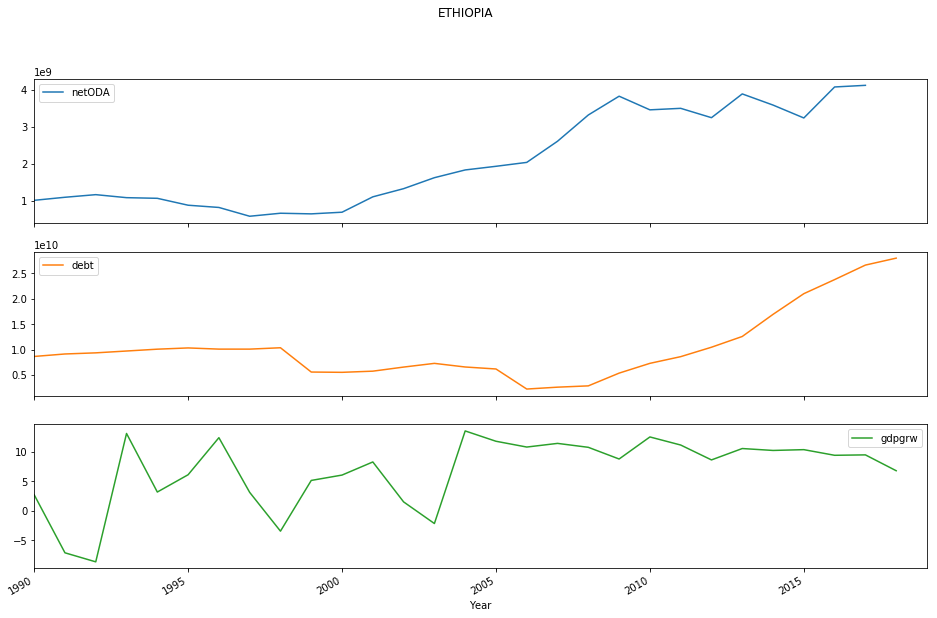

In [71]:
ethiopia_plot = ethiopia.plot.line(subplots=True, legend=True, figsize=(16,10), title='ETHIOPIA')
plt.show()

##### Correlation between ODA, debt level and economic growth in Ethiopia

In [72]:
ethiopia.corr(method ='pearson') 

,netODA,debt,gdpgrw
netODA,1.00,0.43,0.50
debt,0.43,1.00,0.05
gdpgrw,0.50,0.05,1.00


From the graph and correlation result above, Net ODA and economic growth have a positive moderate correlation of 0.5, which implies that as ODA received increases, Ethiopia's economy is likely to grow positively. 

Also, from the graph, prior to 2000, Ethiopia received low ODA, and in that same period, the economy was fluctuating (increase and decrease). However, as net ODA continued to increase, economic growth became stable and kept increasing

There is a fairly strong correlation between debt level and ODA received of 0.43 and a very weak positive relationship between debt and economic growth of 0.05. From the graph, as ODA increased between 2000 and 2005, debt level stayed low, however from 2007, debt levels picked up even as ODA increased and economic growth also increased

#### EGYPT

In [73]:
#select data for only EGYPT
egypt = ODAGDPdebt.loc[ODAGDPdebt['Country'] == 'Egypt, Arab Rep.']
pd.options.display.float_format = '{:,.2f}'.format
egypt

,Year,Country,netODA,debt,gdpgrw
49,1990,"Egypt, Arab Rep.",6065200000,"33,015,720,171.30",5.67
105,1991,"Egypt, Arab Rep.",5408840000,"32,604,272,498.30",1.13
161,1992,"Egypt, Arab Rep.",3737700000,"31,168,986,021.50",4.47
217,1993,"Egypt, Arab Rep.",2485230000,"30,651,243,858.90",2.90
273,1994,"Egypt, Arab Rep.",2692200000,32499139580,3.97
329,1995,"Egypt, Arab Rep.",2028070000,"33,475,216,024.70",4.64
385,1996,"Egypt, Arab Rep.",2193900000,"31,512,670,142.20",4.99
441,1997,"Egypt, Arab Rep.",2009460000,"29,952,913,694.80",5.49
497,1998,"Egypt, Arab Rep.",1974140000,"32,347,186,890.40",5.58
553,1999,"Egypt, Arab Rep.",1620250000,"31,121,616,151.40",6.05


In [74]:
#convert to numeric and set index to be year
egypt["netODA"] = pd.to_numeric(egypt.netODA, errors='coerce')
egypt["debt"] = pd.to_numeric(egypt.debt, errors='coerce')
egypt["gdpgrw"] = pd.to_numeric(egypt.gdpgrw, errors='coerce')
egypt.set_index("Year",drop=True,inplace=True)
egypt

,Country,netODA,debt,gdpgrw
Year,,,,
1990,"Egypt, Arab Rep.","6,065,200,000.00","33,015,720,171.30",5.67
1991,"Egypt, Arab Rep.","5,408,840,000.00","32,604,272,498.30",1.13
1992,"Egypt, Arab Rep.","3,737,700,000.00","31,168,986,021.50",4.47
1993,"Egypt, Arab Rep.","2,485,230,000.00","30,651,243,858.90",2.90
1994,"Egypt, Arab Rep.","2,692,200,000.00","32,499,139,580.00",3.97
1995,"Egypt, Arab Rep.","2,028,070,000.00","33,475,216,024.70",4.64
1996,"Egypt, Arab Rep.","2,193,900,000.00","31,512,670,142.20",4.99
1997,"Egypt, Arab Rep.","2,009,460,000.00","29,952,913,694.80",5.49
1998,"Egypt, Arab Rep.","1,974,140,000.00","32,347,186,890.40",5.58


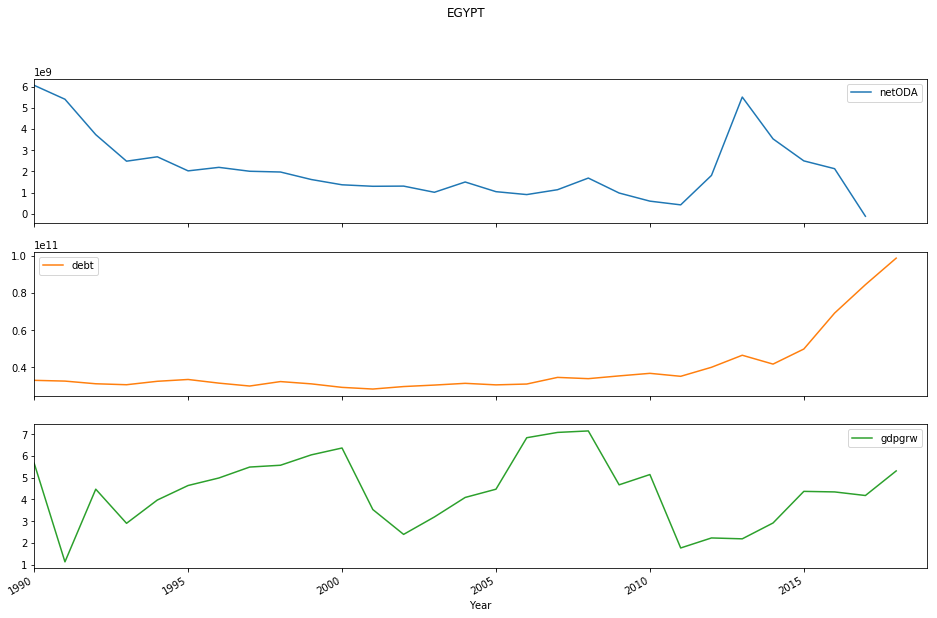

In [75]:
egypt_plot = egypt.plot.line(subplots=True, legend=True, figsize=(16,10), title='EGYPT')
plt.show()

In [76]:
egypt.corr(method ='pearson') 

,netODA,debt,gdpgrw
netODA,1.00,-0.10,-0.26
debt,-0.10,1.00,-0.01
gdpgrw,-0.26,-0.01,1.00


From the graph and analysis above, there is a weak negative relationship between net ODA and economic growth in Egypt. Egypt had very high levels of ODA received in 1990 and it has been decreasing since then. It increased sharply in 2013 but has been falling since then and currently maintains negative rate for ODA received. However, this has not affected the economy which is still growing

## KEY FINDINGS AND CONCLUSION

Compared to South Asia which is also a very populated and developing region, Africa has received more Official Development Assistance but economic growth in South Asia has been significantly higher than in Africa. This questions the relationship between ODA received and economic growth because one would expect the economy receiving more ODA to grow faster.

A closer examination of the relationship between ODA and GDP growth produces a weak negative relationship between the two

This report also shows that Ethiopia has always been among the top 10 highest recipients of ODA over the years. The correlation coefficient also shows a moderately strong positive relationship between ODA received and economic growth in Ethiopia

This could be because Ethiopia is using ODA received to invest in large scale infrastructure which in turn is translating to economic growth

Egypt on the other hand, used to receive high ODA but is now a giver of ODA, however, the economy is still growing. This could be a riple effect of past trade and investment

Recommendation - No matter how much African countries receive in foreign aid, if this money is not invested in infrastructure and human capital development, economic growth will remain low

##### THANK YOU